# Demonstration elementarer Quanten-Algorithmen

### Importiere Qiskit, Numpy etc.

In [1]:
from qiskit import *
from qiskit import Aer
from qiskit.providers.ibmq import least_busy
from qiskit.compiler import assemble
from qiskit.visualization import plot_histogram
from qiskit.extensions import *

import numpy as np
import random

### Demo: Quantum Teleportation - einfach

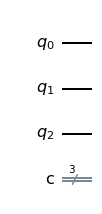

In [2]:
from qiskit import *
from qiskit import Aer
from qiskit.compiler import assemble

# Erstelle einen Schaltkreis mit drei Qubits und drei klassischen Qubits für die Messung
# q0: Qubit des Senders für die Übertragung
# q1: Verschränktes Qubit des Senders
# q2: Verschränktes Qubit des Empfängers

qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg, creg)

circuit.draw(output='mpl')

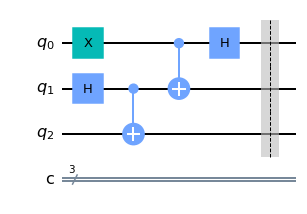

In [3]:
#Ergänze den Schaltkreis bis zur Messung:

# Erzeuge aus dem Qubit des Senders und des Empfängers einen Bell-Zustand:
circuit.h(1)
circuit.cx(1,2)


# 1. Der Sender möchte eine gleichmäßige Superposition übertragen:
#circuit.h(0)
# 2. Der Sender möchte ein |1> übertragen:
circuit.x(0)
# 3. Der Sender möchte ein |0>  übertragen:
#

# Verschränke dieses Qubit mit dem Qubit 1 des Senders und wende H darauf an:
circuit.cx(0,1)
circuit.h(0)

circuit.barrier(range(3))
circuit.draw(output='mpl')


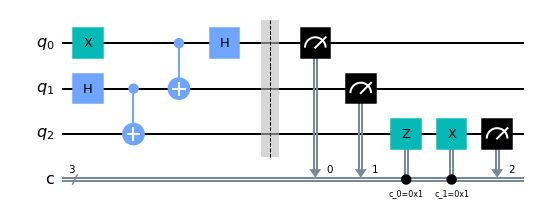

In [4]:
# Führe jetzt die Messung durch:
# Sender misst seine beiden Qubits
circuit.measure(0, 0)
circuit.measure(1, 1)

# Abhängig von diesen Messungen wendet der Empfänger ein Z bzw. X-Gate auf sein Qubit an und misst dieses:
circuit.z(2).c_if(creg[0], 1)
circuit.x(2).c_if(creg[1], 1)

circuit.measure(2, 2)

#Display confirmation
circuit.draw(output='mpl')

{'111': 264, '100': 259, '110': 246, '101': 255}


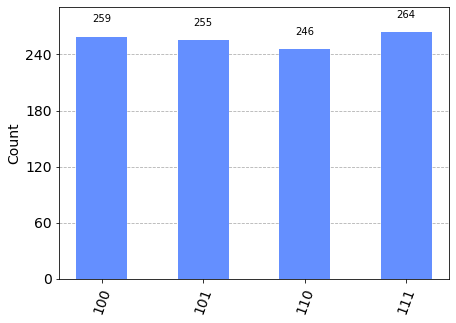

In [5]:
# Führe das Experiment auf dem Quasm-Simulator mit 1024 Shots durch
backend = Aer.get_backend('qasm_simulator')
qobj = assemble(circuit)

result_sim = backend.run(qobj, shots=1024).result()

# Zeige die Ergbenisse: Das Bit ganz links ist in der Qiskit-Notation das Ergebnis der Messung von q2!
counts = result_sim.get_counts(circuit)
print(counts)
plot_histogram(counts)

### Demo: Quantum Teleportation - allgemein

In [6]:
#Sender präpariert sein Qubit durch eine Drehung um die x-Achse um pi/4:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg, creg)

# Erzeuge aus dem Qubit des Senders und des Empfängers einen Bell-Zustand:
circuit.h(1)
circuit.cx(1,2)

# Sender rotiert sein Qubit um pi/4 um die x-Achse: 
circuit.rx(np.pi/4,0)

# Verschränke dieses Qubit mit dem Qubit 1 des Senders und wende H darauf an:
circuit.cx(0,1)
circuit.h(0)

circuit.barrier(range(3))



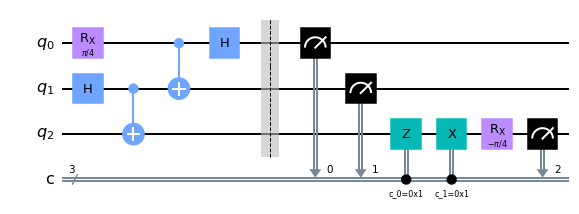

In [7]:
# Führe jetzt die Messung durch:
# Sender misst seine beiden Qubits
circuit.measure(0, 0)
circuit.measure(1, 1)

# Abhängig von diesen Messungen wendet der Empfänger ein Z bzw. X-Gate auf sein Qubit an und misst dieses:
circuit.z(2).c_if(creg[0], 1)
circuit.x(2).c_if(creg[1], 1)

# Bevor der Empfänger misst, dreht er sein Qubit um -pi/4 um die x-Achse:
circuit.rx(-np.pi/4,2)
circuit.measure(2, 2)

#Display confirmation
circuit.draw(output='mpl')


{'001': 262, '000': 269, '010': 268, '011': 225}


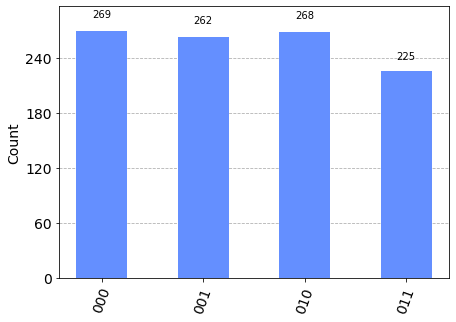

In [8]:
# Führe das Experiment auf dem Quasm-Simulator mit 1024 Shots durch
backend = Aer.get_backend('qasm_simulator')
qobj = assemble(circuit)

result_sim = backend.run(qobj, shots=1024).result()

# Zeige die Ergbenisse: Das Bit ganz links ist in der Qiskit-Notation das Ergebnis der Messung von q2!
counts = result_sim.get_counts(circuit)
print(counts)
plot_histogram(counts)

### Demo: Dichte Codierung

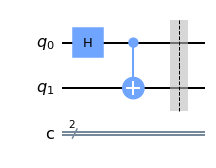

In [9]:
from qiskit import *
from qiskit.visualization import plot_histogram


qreg = QuantumRegister(2,'q')
creg = ClassicalRegister(2,'c')
circuit = QuantumCircuit(qreg, creg)

# Erzeuge einen Bell-Zustand aus den beiden Qubits:

circuit.h(0)
circuit.cx(0,1)

# q_0 bleibt beim Sender
# q_1 geht an den Empfänger der Botschaft
circuit.barrier()
circuit.draw(output = "mpl")

Bitte gegen Sie eine der folgenden Botschaften ein: 
 1. 00 
 2. 01 
3. 10 
4. 11 
10


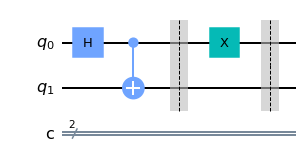

In [10]:
# Codierung der Botschaft 00, 10, 01 oder 11
# In deren Abhängigkeit werden unterschiedliche Gates auf das Qubit 0 angewandt
# 
def codiere(qc, qubit, msg):
    if msg == "00":
      pass    # Bei 00 mache gar nichts ... 
    elif msg == "10":      
        qc.x(qubit) # Bei 10 wende ein X-Gate an   
    elif msg == "01":      
        qc.z(qubit) # Bei 01 wende ein Z-Gate an
    elif msg == "11":
        qc.y(qubit) # Bei 11 wende ein Y-Gate an
    else:     
        print("Ungültige Botschaft !! Es wird 00 gesendet ....")

message = input("Bitte gegen Sie eine der folgenden Botschaften ein: \n 1. 00 \n 2. 01 \n3. 10 \n4. 11 \n")
codiere(circuit, 0, message)
circuit.barrier()
circuit.draw(output = "mpl")

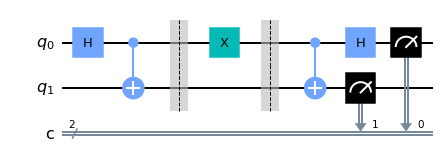

In [11]:
# Nacdem der Empfänger q0 vom Sender empfangen hat, kann er die Decodierung durchführen:

circuit.cx(0,1)
circuit.h(0)


circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])
# Zeige den Schaltkreis:
circuit.draw(output = "mpl")


{'10': 1024}


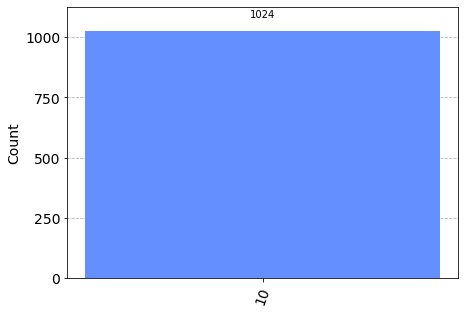

In [12]:
# Führe das Experiment auf dem Quasm-Simulator mit 1024 Shots durch
backend = Aer.get_backend('qasm_simulator')
qobj = assemble(circuit)

result_sim = backend.run(qobj, shots=1024).result()

# Zeige die Ergbenisse: Das Bit ganz links ist in der Qiskit-Notation das Ergebnis der Messung von q2!
counts = result_sim.get_counts(circuit)
print(counts)
plot_histogram(counts)

least busy backend:  ibmq_quito
Job Status: job has successfully run


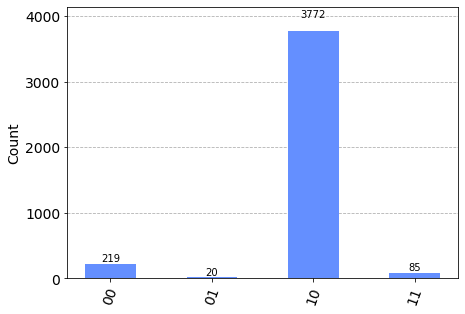

In [13]:
# Berechnung auf einem "echten" Quantencomputer: 
shots = 4096

# Lade die Account Informationen
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
and not x.configuration().simulator
and x.status().operational==True))
print("least busy backend: ", backend)

job = execute(circuit, backend=backend, shots=shots)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
plot_histogram(result.get_counts(circuit))

### Demo: Algorithmus von Deutsch 

[1, 0]


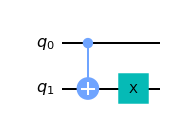

In [14]:
# Lege zuerst das Orakel fest

# Würfle eine Zufallskombination: 
# [0,0], [1,1] :  konstant 
# [0,1], [1,0] :  balnciert
secret = [random.randint(0, 1) for _ in range(2)]
print(secret)

# Konstruiere damit eines der vier möglichen Orakels:
def append_oracle(circuit, secret):
    if secret[0]:
        circuit.cx(0, 1)
        circuit.x(1)
    if secret[1]:
        circuit.cx(0, 1)
    return circuit

qreg_q = QuantumRegister(2,'q')
c_reg_c= QuantumRegister(1,'c')

circ = QuantumCircuit(qreg_q)

circ=append_oracle(circ,secret)
circ.draw('mpl')

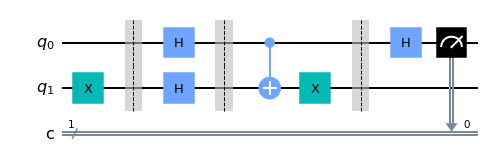

In [15]:
# Erzeuge den Schaltkreis für den Deutsch-Algorithmus


circuit = QuantumCircuit(2,1)

circuit.x(1)
circuit.barrier()
circuit.h(0)
circuit.h(1)
circuit.barrier()
append_oracle(circuit, secret)
circuit.barrier()
circuit.h(0)
circuit.measure(0, 0)

circuit.draw('mpl')

Erwartung: 0 für konstant, 1 für balanciert
{'1': 1024}


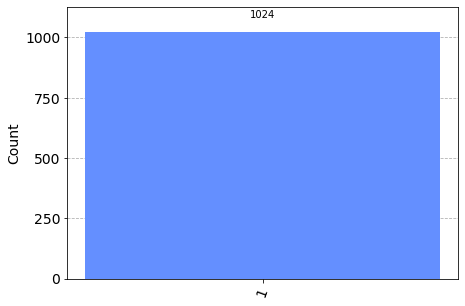

In [16]:
# Führe das Experiment auf dem Quasm-Simulator mit 1024 Shots durch
backend = Aer.get_backend('qasm_simulator')
qobj = assemble(circuit)

result_sim = backend.run(qobj, shots=1024).result()

# Zeige die Ergbenisse: Das Bit ganz links ist in der Qiskit-Notation das Ergebnis der Messung von q2!
counts = result_sim.get_counts(circuit)
print("Erwartung: 0 für konstant, 1 für balanciert")

print(counts)
plot_histogram(counts)

### Grover-Algorithmus für 2 Qubits

[[-1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0  1]]


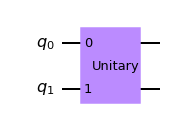

In [17]:
## Definiere das Orakel als unitäre Matrix
## z.B. entspricht |00> + |01>+|10>-|11>:
U_orakel = np.array([[-1,0,0,0], [0,1,0,0],[0,0,1,0], [0,0,0,1]])
print(U_orakel)

## und wandle dieses in ein Orakel-Gatter um:
oracle = QuantumCircuit(2,name='Orakel')
oracle.unitary(U_orakel, [0,1])
oracle.to_gate()
oracle.draw('mpl')


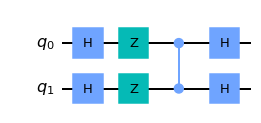

In [18]:
# Definition der Spiegelung am Mittelwert
spiegelung = QuantumCircuit(2,name='spiegelung')

spiegelung.h([0,1]) 
spiegelung.z([0,1])
spiegelung.cz(0,1)
spiegelung.h([0,1])
spiegelung.to_gate()
spiegelung.draw('mpl')


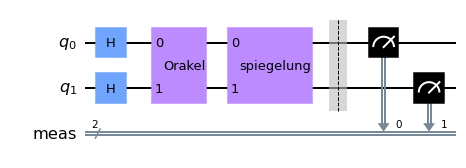

In [19]:
# Führe den gesamten Grover-Schaltkreis aus:
grover = QuantumCircuit(2)
grover.h([0,1])

grover.append(oracle,[0,1])
grover.append(spiegelung, [0,1])

grover.measure_all()
grover.draw('mpl')



{'00': 1024}


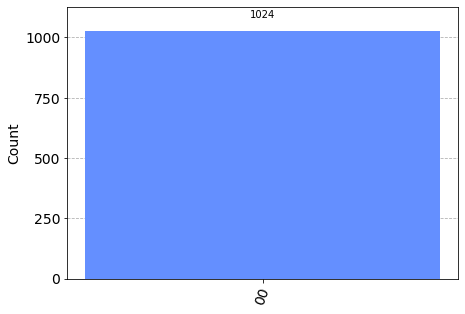

In [20]:
# Und messe das Ergebnis:
backend = Aer.get_backend('qasm_simulator')
result_sim = execute(grover, backend).result().get_counts()
print(result_sim)
# Zeige die Ergbenisse: Das Bit ganz links ist in der Qiskit-Notation das Ergebnis der Messung von q2!
#counts = result_sim.get_counts(grover_circuit)
#print(counts)
plot_histogram(result_sim)

### Grover-Algorithmus für 3 Qubits

In [21]:
## Definiere das Orakel als unitäre Matrix:

def oracle(qc: QuantumCircuit):
    U8x8 = np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0],
                    [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0],[0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,1]])

    gate8x8 = UnitaryGate(U8x8)
    qc.unitary(U8x8, range(3))
    qc.draw()

In [22]:
def spiegelung(qc: QuantumCircuit):
    qc.h(range(3))
 
    qc.x(range(3))    
    qc.barrier(0)
    qc.barrier(1)
    qc.h(2)
    qc.ccx(0,1,2)    
    qc.barrier(0)
    qc.barrier(1)
    qc.h(2)
    qc.x(range(3))
    
    qc.h(range(3))


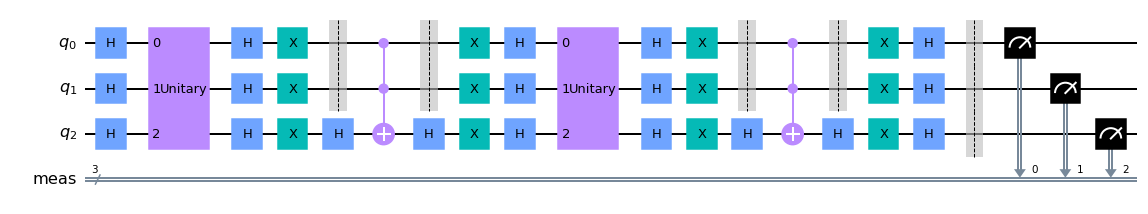

In [23]:
##  Gesamter Schaltkreis:
qr = QuantumRegister(3)

grover = QuantumCircuit(3)
grover.h(range(3))

# Wende das Oracle an:
#oracle(grover)
# Wende die Spiegelung an:
#spiegelung(grover)

# Zweimalige Anwendung:
oracle(grover)
spiegelung(grover)

oracle(grover)
spiegelung(grover)

grover.measure_all()

# Plot circuit
grover.draw('mpl')

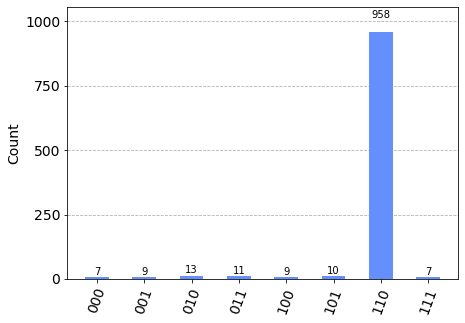

In [24]:
# Und messe das Ergebnis:

backend_sim = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover, backend=backend_sim, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)
#plt.show()

In [25]:
import qiskit.tools.jupyter
%qiskit_version_table